In [38]:
import os
import sys
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import pandas as pd
import matplotlib.pyplot as plt
import plotnine as gg
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
import seaborn
import umap
from pathlib import Path
from os.path import abspath


## loading of Data

In [39]:
#file_path = Path("../2018_11_20_Batch1/C-7210-01-CMP-008-gray_collapsed.csv").resolve()

fpath = Path("../2018_11_20_Batch1/C-7210-01-CMP-008-gray_collapsed_new.csv").resolve()
data = pd.read_csv(fpath)
data.columns

Index(['Metadata_broad_sample', 'Metadata_chemist', 'Metadata_compound_name',
       'Metadata_Annotation', 'Metadata_Target', 'Metadata_Broad_barcode',
       'Metadata_Plate', 'Metadata_Well', 'Metadata_Assay_Plate_Barcode',
       'Metadata_Plate_Map_Name',
       ...
       'Nuclei_Texture_SumAverage_Mito_5_0',
       'Nuclei_Texture_SumAverage_RNA_20_0',
       'Nuclei_Texture_SumEntropy_DNA_10_0',
       'Nuclei_Texture_SumEntropy_DNA_20_0',
       'Nuclei_Texture_SumEntropy_DNA_5_0',
       'Nuclei_Texture_SumEntropy_RNA_5_0',
       'Nuclei_Texture_SumVariance_DNA_20_0',
       'Nuclei_Texture_Variance_ER_20_0', 'Nuclei_Texture_Variance_Mito_20_0',
       'Nuclei_Texture_Variance_RNA_10_0'],
      dtype='object', length=620)

In [43]:
metadata = [col for col in data.columns if "Meta" in col]
variables = [col for col in data.columns if not "Meta" in col]


reducer = umap.UMAP()
embedding = reducer.fit_transform(data.loc[:,variables].values)
    

In [44]:
metadata

['Metadata_broad_sample',
 'Metadata_chemist',
 'Metadata_compound_name',
 'Metadata_Annotation',
 'Metadata_Target',
 'Metadata_Broad_barcode',
 'Metadata_Plate',
 'Metadata_Well',
 'Metadata_Assay_Plate_Barcode',
 'Metadata_Plate_Map_Name',
 'Metadata_cell_line',
 'Metadata_well_position',
 'Metadata_mg_per_ml',
 'Metadata_mmoles_per_liter',
 'Metadata_solvent',
 'Metadata_cell_id',
 'Metadata_pert_id',
 'Metadata_pert_mfc_id',
 'Metadata_pert_well',
 'Metadata_broad_sample_type',
 'Metadata_pert_vehicle',
 'Metadata_pert_type']

In [55]:
test = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])
combined = test.merge(data.loc[:, metadata], left_index=True, right_index=True)

A549 = combined.query("Metadata_cell_line == 'A549'")

A549 = A549[A549['Metadata_Target'].isin(['control', 'SECRET'])]

A549

,UMAP-1,UMAP-2,Metadata_broad_sample,Metadata_chemist,Metadata_compound_name,Metadata_Annotation,Metadata_Target,Metadata_Broad_barcode,Metadata_Plate,Metadata_Well,...,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,Metadata_cell_id,Metadata_pert_id,Metadata_pert_mfc_id,Metadata_pert_well,Metadata_broad_sample_type,Metadata_pert_vehicle,Metadata_pert_type
64,23.639952,-1.694995,BRD-U43181200-000-01-8,Baishan Jiang,BSJ-03-136,active (protac),SECRET,1.136944e+09,BR00100032,H05,...,0.0,2.5,DMSO,A549,BRD-U43181200,BRD-U43181200-000-01-8,H05,trt,DMSO,trt
65,23.692947,-1.748026,BRD-U43181200-000-01-8,Baishan Jiang,BSJ-03-136,active (protac),SECRET,1.136944e+09,BR00100032,H09,...,0.0,2.5,DMSO,A549,BRD-U43181200,BRD-U43181200-000-01-8,H09,trt,DMSO,trt
66,23.629477,-1.684499,BRD-U43181200-000-01-8,Baishan Jiang,BSJ-03-136,active (protac),SECRET,1.136944e+09,BR00100032,H18,...,0.0,2.5,DMSO,A549,BRD-U43181200,BRD-U43181200-000-01-8,H18,trt,DMSO,trt
67,23.616730,-1.671831,BRD-U43181200-000-01-8,Baishan Jiang,BSJ-03-136,active (protac),SECRET,1.136944e+09,BR00100032,H22,...,0.0,2.5,DMSO,A549,BRD-U43181200,BRD-U43181200-000-01-8,H22,trt,DMSO,trt
68,23.667738,-1.722851,BRD-U43181200-000-01-8,Baishan Jiang,BSJ-03-136,active (protac),SECRET,1.136944e+09,BR00100032,I03,...,0.0,2.5,DMSO,A549,BRD-U43181200,BRD-U43181200-000-01-8,I03,trt,DMSO,trt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,7.812569,-8.567988,DMSO,Drug Repurposing,DMSO,control,control,NaN,BR00100032,P20,...,0.0,0.0,DMSO,A549,NaN,NaN,P20,control,DMSO,control
492,7.623060,-8.643617,DMSO,Drug Repurposing,DMSO,control,control,NaN,BR00100032,P21,...,0.0,0.0,DMSO,A549,NaN,NaN,P21,control,DMSO,control
493,7.645031,-8.691092,DMSO,Drug Repurposing,DMSO,control,control,NaN,BR00100032,P22,...,0.0,0.0,DMSO,A549,NaN,NaN,P22,control,DMSO,control
494,7.651123,-8.816438,DMSO,Drug Repurposing,DMSO,control,control,NaN,BR00100032,P23,...,0.0,0.0,DMSO,A549,NaN,NaN,P23,control,DMSO,control


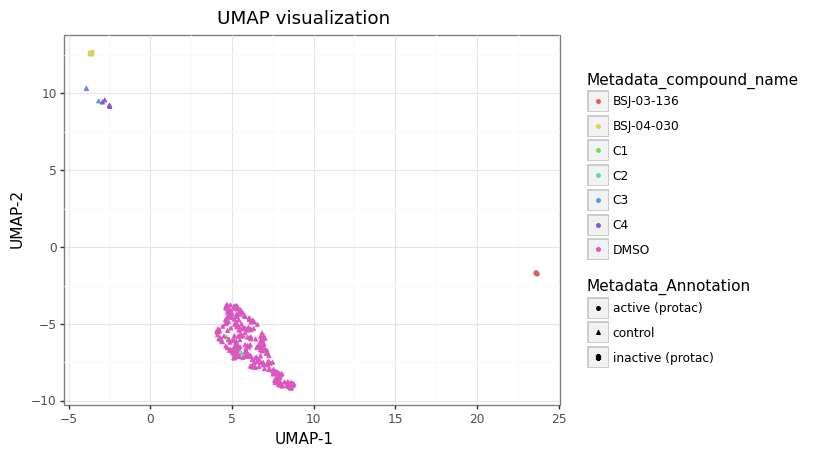

<ggplot: (7027391445)>

In [56]:
p = gg.ggplot(A549, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_compound_name', shape="Metadata_Annotation")) + \
    gg.geom_point(size = 1) + \
    gg.xlab("UMAP-1") + \
    gg.ylab("UMAP-2") + \
    gg.ggtitle("UMAP visualization") + \
    gg.theme_bw() 
#+ \
#     gg.scale_colour_manual(name= "Cellline", 
#                            labels=['A549', 'U20S'], 
#                            values = ["#d95f0e", "#2c7fb8"])
    
   

    

#gg.ggsave(filename='Modes_DMSO_UMAP.png', plot = p, path = '/Users/habbasi/Desktop/')

p 

In [6]:

file1 = os.path.join(path, 'C-7210-01-CMP-008-gray_collapsed.csv')

# Platemap 
path = '/Users/habbasi/Desktop/2018_11_20_Batch1'
file2 = os.path.join(path, 'Nathaniel_Gray_platemap.csv')


data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)


#Merging of dataframes (Platemap with compound information + old data)
#data = data2.merge(data1, on = ['Metadata_broad_sample'])

data = pd.merge(data1, data2, on=['Metadata_broad_sample'], how='inner')
data.head()

#data.to_csv("/Users/habbasi/Desktop/2018_11_20_Batch1/C-7210-01-CMP-008-gray_collapsed_new1.csv", index=False)
data.head()
metacol = data.columns.str.contains('Metadata')
var = data.loc[:, ~metacol]
compound = pd.DataFrame(data[['Metadata_compound_name', 'Metadata_Annotation']])
df = compound.merge(var, left_index=True, right_index=True)
df.head()



,Metadata_compound_name,Metadata_Annotation,Cells_AreaShape_Area,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_Solidity,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_2_0,...,Nuclei_Texture_SumAverage_Mito_5_0,Nuclei_Texture_SumAverage_RNA_20_0,Nuclei_Texture_SumEntropy_DNA_10_0,Nuclei_Texture_SumEntropy_DNA_20_0,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_SumVariance_DNA_20_0,Nuclei_Texture_Variance_ER_20_0,Nuclei_Texture_Variance_Mito_20_0,Nuclei_Texture_Variance_RNA_10_0
0,DMSO,control,-0.338651,-0.358403,-0.327824,0.090855,0.331456,0.007196,0.334137,0.377472,...,5.164938,2.455603,0.526889,-0.374890,0.228141,1.703870,-0.293441,-0.750370,-1.067705,2.443629
1,DMSO,control,0.002656,0.223358,0.243922,-0.146758,0.235445,-0.008030,-0.152354,0.345686,...,5.224594,2.466235,1.039002,0.359449,0.353371,1.746358,0.363410,-0.399584,-0.570497,2.934718
2,DMSO,control,-0.078401,1.031104,0.918579,-1.040527,-0.740076,-1.120205,-0.956084,0.127276,...,4.433582,1.607650,-0.528519,-0.840525,-0.571717,1.007865,-0.962445,-1.555760,-1.393898,2.521685
3,DMSO,control,-0.292199,1.091156,1.445546,-1.202122,0.427984,-0.405610,-0.896888,-0.446857,...,4.790513,2.049889,1.129831,0.124433,0.759763,1.730682,0.057532,-0.299879,-0.390767,2.378503
4,DMSO,control,-0.486082,1.520651,1.348605,-1.000145,0.192637,-0.939495,-0.862107,-1.070563,...,4.415261,1.759330,-0.679289,-1.082227,-0.505341,1.561501,-1.312822,-0.120841,-0.694946,2.649963


In [ ]:
# compounds names are converted into index column using groupby function and reset it back
# df_merge = df_merge.rename_axis('Metadata_compound_name').reset_index()
# df_merge.head()

In [7]:
# Aggregating mean profiles per Metadata_Broad_sample
df_merge = df.groupby('Metadata_compound_name').mean()
df_merge.head()

sample_var = df_merge.columns.str.contains('Metadata')
var_selected = df_merge.loc[:, ~sample_var]
var_selected.head()

,Cells_AreaShape_Area,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_Solidity,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_3_1,Cells_AreaShape_Zernike_3_3,...,Nuclei_Texture_SumAverage_Mito_5_0,Nuclei_Texture_SumAverage_RNA_20_0,Nuclei_Texture_SumEntropy_DNA_10_0,Nuclei_Texture_SumEntropy_DNA_20_0,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_SumVariance_DNA_20_0,Nuclei_Texture_Variance_ER_20_0,Nuclei_Texture_Variance_Mito_20_0,Nuclei_Texture_Variance_RNA_10_0
Metadata_compound_name,,,,,,,,,,,,,,,,,,,,,
AX15836,-0.775979,-0.244262,-0.386021,0.173087,0.350243,0.033650,0.594214,0.140865,-0.306743,0.639600,...,0.557308,0.140026,0.273171,-0.182929,0.374104,0.542760,-0.252515,0.048167,0.057386,0.370566
BJP-06-005-3,-0.576870,-0.253715,-0.379721,0.229889,0.325399,0.144148,0.463031,0.175006,-0.219663,0.507701,...,0.507972,-0.054632,0.173438,-0.105549,0.263737,0.344356,-0.226448,-0.407271,-0.100908,0.221862
BJP-06-115-3,-0.609039,-0.322537,-0.458257,0.208973,0.212805,0.046103,0.515692,0.246543,-0.257748,0.415530,...,0.093719,-0.282037,-0.084258,-0.320325,0.027365,0.191586,-0.475140,-0.439627,-0.220809,0.022798
BSJ-03-136,3.906117,3.560020,3.079834,-3.070611,-1.253681,-0.130163,-3.463964,-1.864802,2.466615,-1.262589,...,1.249316,0.276708,0.548774,0.763211,-0.000387,-0.050530,1.824343,0.644147,0.633125,-0.225603
BSJ-04-030,2.110605,0.590785,0.265076,-1.087407,-1.176394,-0.012309,-1.196037,0.169989,-0.026851,-1.238263,...,-0.045753,-0.715485,-0.229877,0.171510,-0.444318,-0.730512,0.678970,0.637961,0.000906,-0.333072


# Data Parsing

In [8]:

filter_A549 = (data.Metadata_Plate == 'BR00100032') | (data.Metadata_cell_line == 'A549')
filter_U2oS  = (data.Metadata_Plate == 'BR00100037') | (data.Metadata_cell_line == 'U2oS')

data_A549 = data[filter_A549]
data_U2oS = data[filter_U2oS]

data_U2oS.head()

metacol_A549 = data_A549.columns.str.contains('Metadata')
metacol_U2oS = data_U2oS.columns.str.contains('Metadata')

var_A549 = data_A549.loc[:, ~metacol_A549]
compound_A549 = pd.DataFrame(data_A549[['Metadata_compound_name', 'Metadata_Annotation']])

var_U2oS = data_U2oS.loc[:, ~metacol_U2oS]
compound_U2oS = pd.DataFrame(data_U2oS[['Metadata_compound_name', 'Metadata_Annotation']])

df_A549 = compound_A549.merge(var_A549, left_index=True, right_index=True)
df_A549_merge = df_A549.groupby('Metadata_compound_name').mean()

df_U2oS = compound_U2oS.merge(var_U2oS, left_index=True, right_index=True)
df_U2oS_merge = df_U2oS.groupby('Metadata_compound_name').mean()

df_U2oS_merge.head()


,Cells_AreaShape_Area,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_Solidity,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_3_1,Cells_AreaShape_Zernike_3_3,...,Nuclei_Texture_SumAverage_Mito_5_0,Nuclei_Texture_SumAverage_RNA_20_0,Nuclei_Texture_SumEntropy_DNA_10_0,Nuclei_Texture_SumEntropy_DNA_20_0,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_SumVariance_DNA_20_0,Nuclei_Texture_Variance_ER_20_0,Nuclei_Texture_Variance_Mito_20_0,Nuclei_Texture_Variance_RNA_10_0
Metadata_compound_name,,,,,,,,,,,,,,,,,,,,,
AX15836,-0.880702,-0.667770,-0.743821,0.585738,0.207029,0.213651,0.723277,0.677655,-0.678137,0.632492,...,0.382654,0.388627,0.016930,-0.031719,0.143374,0.708184,-0.130434,0.196846,-0.176745,0.585618
BJP-06-005-3,-0.618417,-0.475001,-0.475690,0.348810,0.164993,0.217936,0.393621,0.494344,-0.423960,0.410585,...,1.031989,0.121367,-0.088522,-0.072619,0.022832,0.744384,-0.201730,-0.336601,-0.221760,0.870045
BJP-06-115-3,-0.644676,-0.574528,-0.628840,0.424655,0.054407,0.136659,0.520802,0.612779,-0.534148,0.230595,...,0.031406,-0.238080,-0.392944,-0.373796,-0.285641,0.426432,-0.551706,-0.550827,-0.737831,0.357346
BSJ-03-136,2.827595,3.102461,1.419406,-4.843746,-0.772142,-1.285012,-3.138325,-2.498963,1.728469,-0.725627,...,-0.314659,-0.013041,0.557911,0.463807,0.355008,-0.959514,1.008034,-1.256256,0.670170,-0.876329
BSJ-04-030,2.068861,1.919291,1.081609,-2.976643,-0.343839,-0.496305,-2.187166,-1.515240,1.259169,-0.743113,...,-0.144547,-0.268965,0.256724,0.231348,0.069513,-0.444151,0.662521,0.367962,0.888484,-0.203274


# For combining merging two cell lines

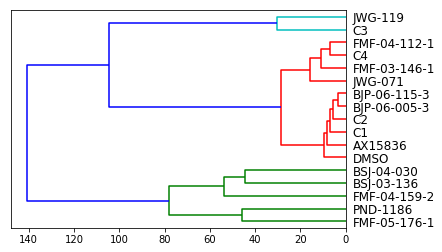

In [9]:


Z_A549 =sch.linkage(df_A549_merge, 'ward')
fig = dendrogram(Z_A549, leaf_rotation=0, orientation="left", labels=df_A549_merge.index)
plt.savefig('/Users/habbasi/Desktop/Gray_dendogram_A549.pdf', bbox_inches='tight') 


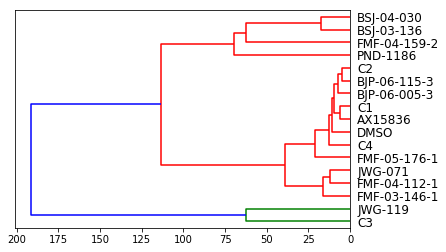

In [10]:
Z_U2oS =sch.linkage(df_U2oS_merge, 'ward')
fig = dendrogram(Z_U2oS, leaf_rotation=0, orientation="left", labels=df_U2oS_merge.index)
plt.savefig('/Users/habbasi/Desktop/Gray_dendogram_U2oS.pdf', bbox_inches='tight') 

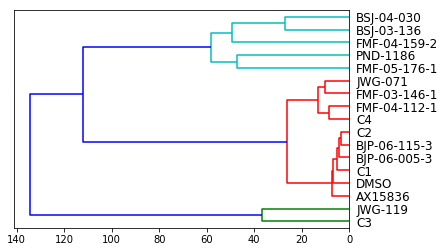

In [11]:
Z=sch.linkage(df_merge, 'ward')
fig = dendrogram(Z, leaf_rotation=0, orientation="left", labels=df_merge.index)
# my_palette = plt.cm.get_cmap("Accent", 3)
# test['Metadata_broad_sample'] = pd.Categorical(test['Metadata_broad_sample'])
plt.savefig('/Users/habbasi/Desktop/Gray_dendogram.pdf', bbox_inches='tight') 

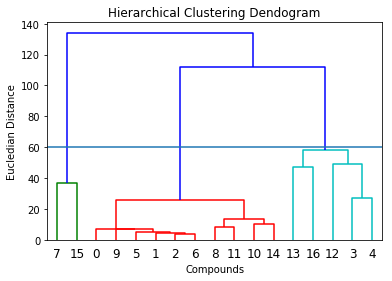

In [57]:
fig = sch.dendrogram(sch.linkage(df_merge, method ='ward'))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Compounds')
plt.ylabel('Eucledian Distance')
plt.axhline(y=60)
plt.savefig('/Users/habbasi/Desktop/Gray_dendogram_top.pdf', bbox_inches='tight') 